In [50]:
#Importing packages
using Plots
using StatsBase
using StatsPlots
using Distributions
using LinearAlgebra
using LaTeXStrings

## Eigenvalue spacing distribution
It was seen that the eigenvalue spacings of Gaussian ensembles have a characteristic distribution. When the spacing is close to zero, there is almost zero probability of finding the eigenvalues. This is known as level repulsion, that is, two eigenvalues repel when they are close to each other. The analytic function was surmised by Wigner. For a 2X2 matrix, the exact analytic function is of the form:
$$P_w(s) = \frac{\pi}{2}s e^{-\pi s^2/4} \ \ \ \ \ \ \ \ (\ for\  GOE\ )$$
$$P_w(s) = \frac{32}{\pi^2}s^2 e^{-4 s^2/\pi} \ \ \ \ \  \ \ (\ for\  GUE\ )$$

In [5]:
#defining GOE hamiltonian of dimension nxn
function Ham(n)
    H=zeros(n,n)
    for i = 1:n
        for j = 1:n
            if i==j
                H[i,j]=rand(Normal(0,1))
            elseif i<j
                    H[i,j]=rand(Normal(0,1))
                    H[j,i]=H[i,j]
                end
            end
        end
    p=eigvals(H)/sqrt(n)
    p
end
#function which returns array of eigenvalue spacing
function spacings(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham(n))
        for i =1:length(p)-1
            s=(p[i+1]-p[i])
            append!(l,s)
        end
    end
    l
end
#Wigner surmise function for GOE 
function f(i)
    return (pi/2)*i*exp(-i^2*pi*0.25)
end

f (generic function with 1 method)

In [27]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of spacing distribution and the deviation
function plotting(n,t)
  l2=spacings(n,t);
  l21=sort(l2)/mean(l2);
  a=findall(x->x<6, l21);
  ind=length(a)
  l22=l21[1:ind]
  hist_obj2 = fit(Histogram, l22/1, nbins=1000);
  h2=normalize(hist_obj2);
  s=h2.edges[1][1]
  e=h2.edges[1][length(h2.edges[1])]
  x2=LinRange(s,e,length(h2.weights))
  y2=f.(x2)
  p=plot(x2,y2, label="analytic P(s)")
  q=plot!(x2,h2.weights, xlabel="s", ylabel="Probability", title= "Spacing distribution for GOE (N=$n)",label="numeric")
  s2=h2.weights.-y2;
  q, s2, x2
end


plotting (generic function with 1 method)

In [22]:
q,s,x= plotting(2,10000000)

(Plot{Plots.GRBackend() n=2}, [0.00382, 0.004538311197159797, 0.004617550405473483, 0.00441864545352318, 0.00438252380479779, 0.005730112375272059, 0.0070823373511364335, 0.00606012400672791, 0.00754439652271191, 0.00707607780456522  …  -3.2867090676930634e-8, -3.164267582894744e-8, -3.046264504034128e-8, -2.932543667382744e-8, -2.822954226381031e-8, -2.717350477094639e-8, -2.6155916891685228e-8, -2.5175419421134375e-8, -2.4230699667646795e-8, 1.997667951008243e-5], LinRange{Float64}(0.0, 5.0, 1000))

In [41]:
q1,s1,x1=plotting(10,1000000)


(Plot{Plots.GRBackend() n=2}, [0.008966666666666666, 0.010888601756945438, 0.011817975674946642, 0.01296222138692648, 0.016050982364896646, 0.016713884522323683, 0.017058308169188685, 0.020980493326151553, 0.023143311737526845, 0.02214292781162297  …  -4.369714492987222e-11, -3.997727653422617e-11, -3.656820011478853e-11, -3.344446155755281e-11, -3.058264751639783e-11, -2.7961225500522887e-11, -2.5560396185780387e-11, -2.3361957040410192e-11, -2.1349176421354878e-11, 1.1111091604433753e-5], LinRange{Float64}(0.0, 5.8500000000000005, 585))

In [34]:
q2,s2,x2=plotting(100,100000)


(Plot{Plots.GRBackend() n=2}, [0.00912268812536779, 0.016346835346892144, 0.016360469396770223, 0.021401439334587206, 0.03187816273900762, 0.027948676981990633, 0.031574962523827174, 0.0361479144360195, 0.04077260409787811, 0.04024334146550915  …  0.0008019945491339667, 0.0013032411504189493, 0.0009022438710881139, 0.0012029918320923991, 0.00150373979302546, 0.0015037397937163546, 0.0010024931940526298, 0.00040099727427529426, 0.001002493195155816, 0.00030074795522378194], LinRange{Float64}(0.0, 6.0, 600))

In [ ]:
q3,s3,x3=plotting(1000,1000)

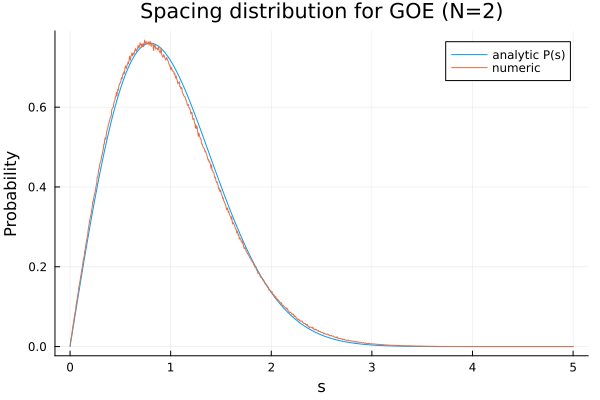

In [42]:
q

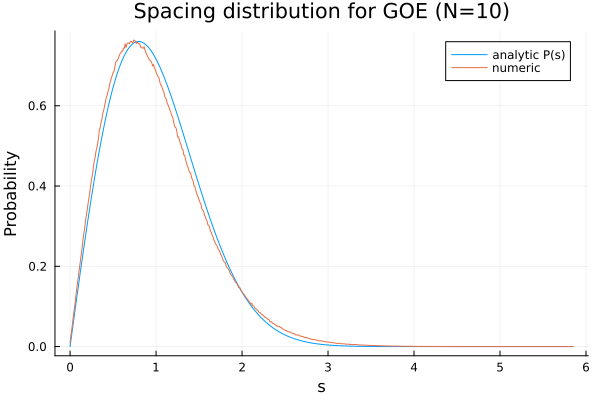

In [43]:
q1

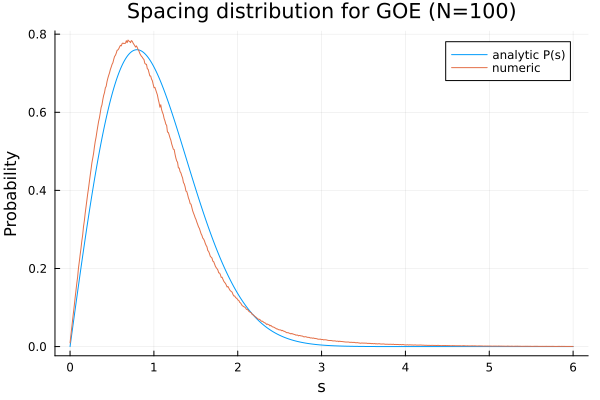

In [44]:
q2

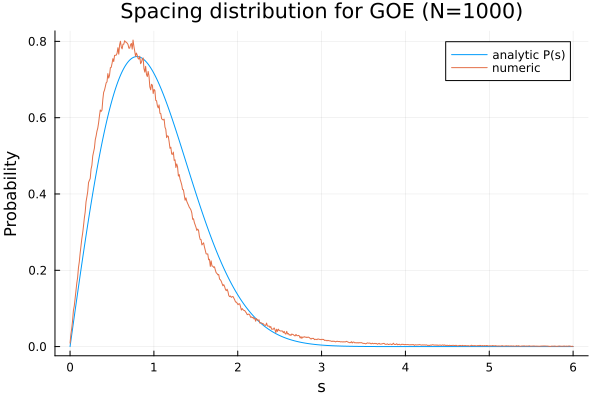

In [45]:
q3

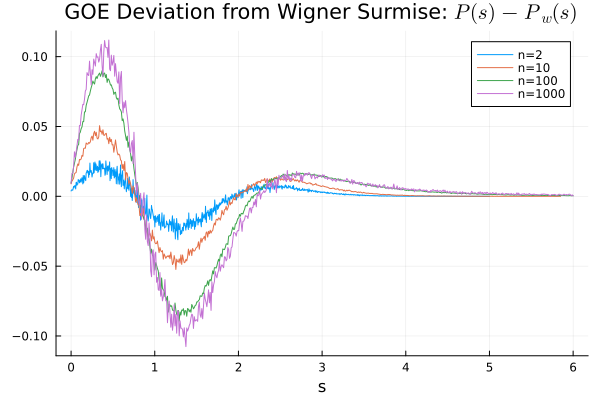

In [55]:
plot(x,s, label="n=2")
plot!(x1,s1, label="n=10")
plot!(x2,s2, label="n=100")
plot!(x3,s3, label="n=1000", title=L"GOE Deviation from Wigner Surmise: $P(s)-P_w(s)$", xlabel="s", ylabel="")

Above we have plotted the deviation from the Wigner surmise function, that is, $P_{numeric}(s)-P_W(s)$ for matrices of different dimensions. We see a characteristic pattern of the deviation graph for all dimension. We see that the deviation for N=2 is the least (which is expected since the analytic function is exact for 2X2 matrix). The scale of deviation increases as we increase the dimension of the matrix size. We now do the same thing for GUE matrices.

In [57]:
#Defining hamiltonian for GUE matrices
function Ham1(n)
    H=complex(zeros(n,n))
    for i = 1:n
        for j = 1:n
            if i==j
                H[i,j]=rand(Normal(0,1))
            elseif i<j
                    H[i,j]=rand(Normal(0,1))+rand(Normal(0,1))im
                    H[j,i]=conj(H[i,j])
                end
            end
        end
    p=eigvals(H)/sqrt(n)
    p
    end
#function which returns array of eigenvalue spacing
function spacings1(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham1(n))
        for i =1:length(p)-1
            s=(p[i+1]-p[i])
            append!(l,s)
        end
    end
    l
end
#Wigner surmise function for GUE 
function f1(i)
    return (32/(pi^2))*i*i*exp(-i^2*4/pi)
end

f1 (generic function with 1 method)

In [76]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of spacing distribution and the deviation
function plotting1(n,t)
    l2=spacings1(n,t);
    l21=sort(l2)/mean(l2);
    a=findall(x->x<6, l21);
    ind=length(a)
    l22=l21[1:ind]
    hist_obj2 = fit(Histogram, l22/1, nbins=1000);
    h2=normalize(hist_obj2);
    s=h2.edges[1][1]
    e=h2.edges[1][length(h2.edges[1])]
    x2=LinRange(s,e,length(h2.weights))
    y2=f1.(x2)
    p=plot(x2,y2, label="analytic P(s)")
    q=plot!(x2,h2.weights, xlabel="s", ylabel="Probability", title= "Spacing distribution for GUE (N=$n)",label="numeric")
    s2=h2.weights.-y2;
    q, s2, x2
  end
  

plotting1 (generic function with 1 method)

In [80]:
u1,su1,xu1=plotting1(2,10000000)
u2,su2,xu2=plotting1(10,100000)
u3,su3,xu3=plotting1(100,10000)
u4,su4,xu4=plotting1(1000,1000)

(Plot{Plots.GRBackend() n=2}, [0.00010018624623174481, 0.0010773377480550888, 0.0007031446685671196, 0.0024856202928876703, 0.0038224101494160863, 0.005017549406765196, 0.0077786625266929015, 0.010007269932635305, 0.012912001111214794, 0.0131940551963739  …  0.00030055873869522893, 0.0006011174773904642, 0.0007013037236222096, 0.0007013037236222101, 0.000500931231158721, 0.0005009312311587214, 0.001001862462317446, 0.001202234954780936, 0.0006011174773904672, 0.0006011174773904675], LinRange{Float64}(0.0, 6.0, 600))

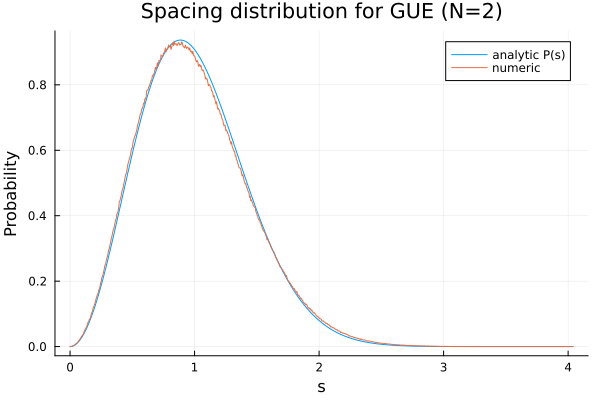

In [81]:
u1

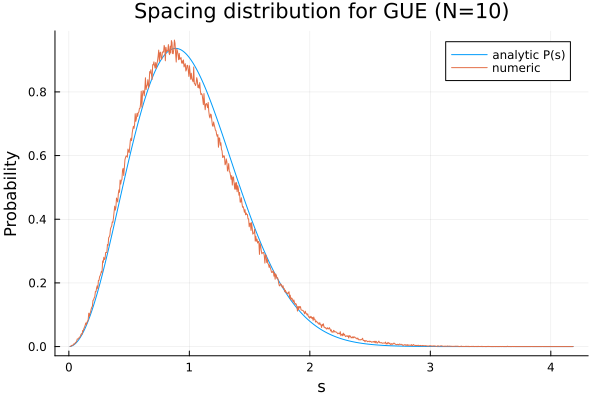

In [82]:
u2

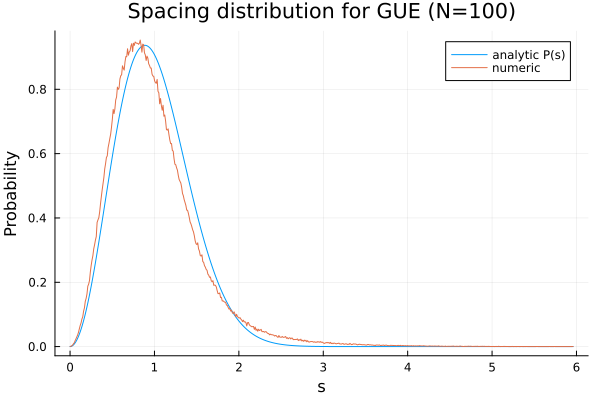

In [83]:
u3

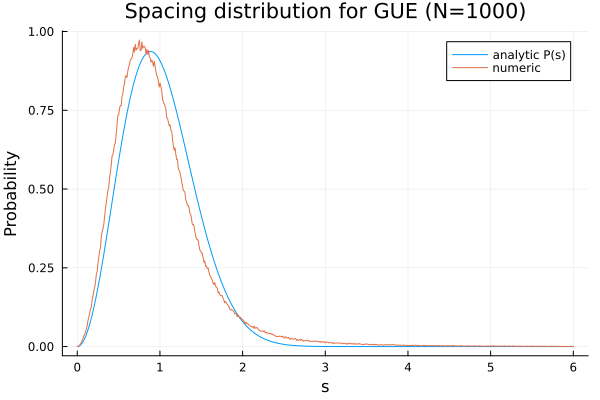

In [84]:
u4

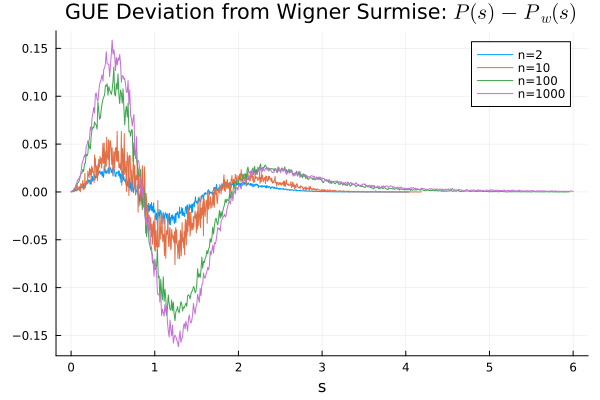

In [85]:
plot(xu1,su1, label="n=2")
plot!(xu2,su2, label="n=10")
plot!(xu3,su3, label="n=100")
plot!(xu4,su4, label="n=1000", title=L"GUE Deviation from Wigner Surmise: $P(s)-P_w(s)$", xlabel="s", ylabel="")

We find that the distribution and deviation follows the same for GUE matrices too. 